In [2]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import json
import json
import ast
from collections import defaultdict

def visualize(image_dir, image_id, text, pred, label, text_label_dict, image_label_dict):
    print("Image ID: ", image_id)
    print("Text: ", text)
    print("Prediction: ", pred)
    print("Label: ", label)
    # print(text_label_dict)
    # import pdb; pdb.set_trace()
    try:
        print("Text Label Dict: ", text_label_dict[image_id])
        if text_label_dict[image_id]['yes'] > text_label_dict[image_id]['no']:
            print("Text Predict: 1")
        else:
            print("Text Predict: 0")
    except KeyError:
        print("No label for this text")
    try:
        print("Image Label Dict: ", image_label_dict[image_id])
        if image_label_dict[image_id][0] > image_label_dict[image_id][1]:
            print("Image Predict: 1")
        else:
            print("Image Predict: 0")
    except KeyError:
        print("No label for this image")
    image_path = os.path.join(image_dir, f"{image_id}.jpg")
        
    # Display the image
    img = Image.open(image_path)
    plt.clf()
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

In [3]:
from collections import defaultdict

text_label_dict = defaultdict(dict)
vision_label_dict = defaultdict(dict)

with open("../sarc_data/intermediate_data/sarc_text_label_logits_eval.txt", 'r') as f:
    reader = f.readlines()
    for line in reader:
        identifier, json_str = line.split(' ', 1)
        data = json.loads(json_str)
        text_label_dict[identifier] = {'yes': -float('inf'), 'no': -float('inf')}
        if 'Yes' in data.keys() and 'No' in data.keys():
            text_label_dict[identifier]['yes'] = data['Yes']
            text_label_dict[identifier]['no'] = data['No']
            text_label_dict[identifier]['pred'] = 1 if data['Yes'] > data['No'] else 0

with open("../sarc_data/intermediate_data/sarc_vision_label_logits.txt", 'r') as f:
    reader = f.readlines()
    for line in reader:
        identifier, list_str = line.split(' ', 1)
        identifier = identifier.split('.')[0]
        data = ast.literal_eval(list_str.strip().replace('\"', ''))
        vision_label_dict[identifier]['yes'] = data[0]
        vision_label_dict[identifier]['no'] = data[1]
        vision_label_dict[identifier]['pred'] = 1 if data[0] > data[1] else 0

print(len(text_label_dict))
print(len(vision_label_dict))

22226
24635


In [4]:
import random
import json

with open("../sarc_data/results/sarc_vision_text_label.jsonl", 'r') as f:
    lines = f.readlines()
random.shuffle(lines)

Image ID:  688074706298253313
Text:  wooooo bring on second semester emoji_75
Prediction:  1
Label:  1
Text Label Dict:  {'yes': -0.005886368, 'no': -5.1465116, 'pred': 1}
Text Predict: 1
Image Label Dict:  {'yes': 18.0, 'no': 17.375, 'pred': 1}
No label for this image


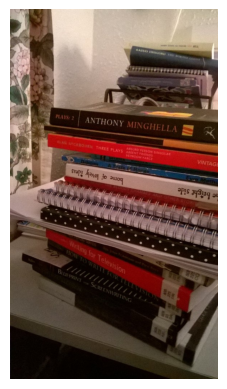

In [7]:
# visualize the first 5 examples
count = 0
for line in lines:
    data = json.loads(line)
    try:
        text_label = text_label_dict[data['image_id']]['pred']
        vision_label = vision_label_dict[data['image_id']]['pred']
        gth_label = data['target']
        pred_label = data['pred']
        if text_label == vision_label and vision_label == 1 and gth_label == 1 and pred_label == gth_label:
            visualize(
                "/root/zqi2/mmodel-soup/sarc_data/raw_data/image_data", 
                data["image_id"], 
                data["text"], 
                data["pred"], 
                data["target"], 
                text_label_dict, 
                vision_label_dict
            )
            count += 1
            if count == 1:
                break
    except:
        continue